In [217]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [218]:
# Creating a feed forward neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [219]:
# Generating data for the regression
dataset_size= 1000
torch.manual_seed(10)
x = torch.unsqueeze(torch.linspace(0, 2 * np.pi, dataset_size), dim=1)
y = torch.sin(x) + 0.2 * torch.randn(x.size())

# Train, valid and test splits
indices = np.random.choice([i for i in range(dataset_size)], dataset_size, replace=False)
train_indeces = indices[:int(dataset_size*0.8)]
x_train, y_train = x[train_indeces], y[train_indeces]

valid_indeces = indices[int(dataset_size*0.8):int(dataset_size*0.9)]
x_valid, y_valid = x[valid_indeces], y[valid_indeces]

test_indeces = np.sort(indices[int(dataset_size*0.9):])
x_test, y_test = x[test_indeces], y[test_indeces]


model = Net()

# Define a loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9, weight_decay=0.0001)

# Training loop with early stopping on validation loss
epochs = 10000
best_val_loss = float('inf')
patience = 25  # Number of epochs with no improvement before stopping
count = 0

train_losses = []
val_losses = []
best_model = None

for epoch in range(epochs):
    model.train()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(x_valid)
        val_loss = criterion(val_outputs, y_valid)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        count = 0
        best_model = model
    else:
        count += 1

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if count >= patience:
        print(f'Early stopping triggered after {epoch+1} epochs.')
        break

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


Epoch [1000/10000], Train Loss: 0.0730, Val Loss: 0.0607
Epoch [2000/10000], Train Loss: 0.0557, Val Loss: 0.0491
Epoch [3000/10000], Train Loss: 0.0467, Val Loss: 0.0451
Epoch [4000/10000], Train Loss: 0.0425, Val Loss: 0.0443
Epoch [5000/10000], Train Loss: 0.0406, Val Loss: 0.0441
Epoch [6000/10000], Train Loss: 0.0396, Val Loss: 0.0438
Epoch [7000/10000], Train Loss: 0.0391, Val Loss: 0.0436
Epoch [8000/10000], Train Loss: 0.0387, Val Loss: 0.0433
Epoch [9000/10000], Train Loss: 0.0385, Val Loss: 0.0431
Early stopping triggered after 9143 epochs.


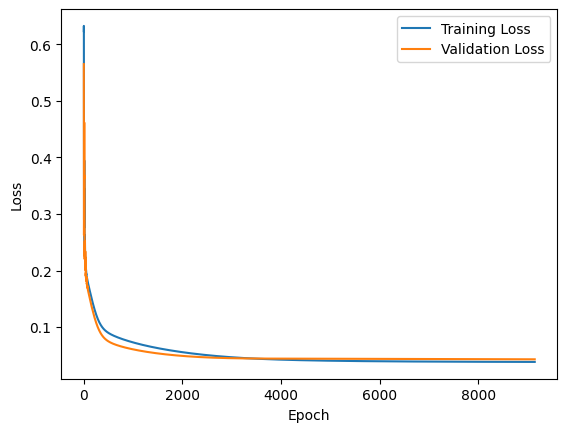

In [220]:
# Plot the training and validation loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

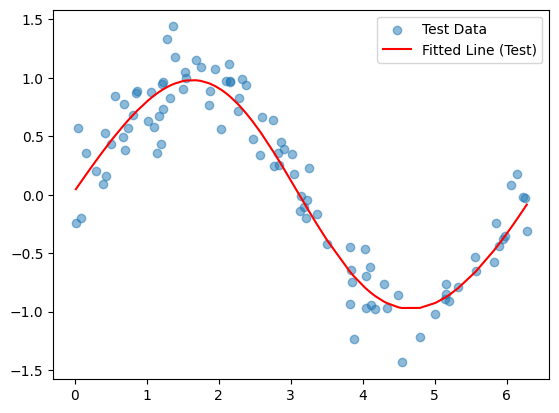

In [221]:
# Plot the best model's predictions on the test split
predicted_test = best_model(x_test)
plt.scatter(x_test, y_test, label='Test Data', alpha=0.5)
plt.plot(x_test, predicted_test.detach().numpy(), 'r', label='Fitted Line (Test)')
plt.legend()
plt.show()
